In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
flowers = pd.read_csv('iris.csv')

In [5]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
flowers.shape

(150, 5)

In [7]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
flowers.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
flowers.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

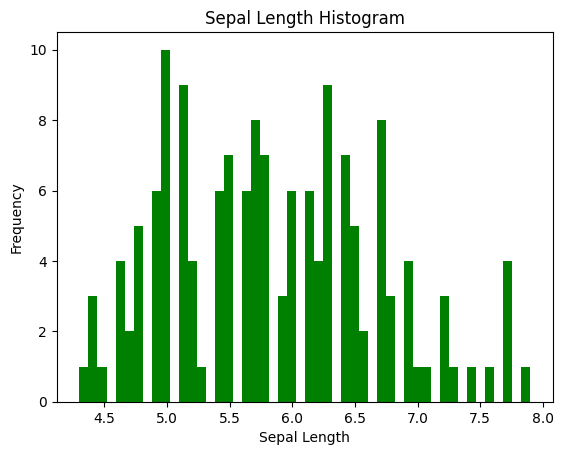

In [25]:
sepal_length = flowers['sepal_length']
plt.hist(sepal_length,bins=50, color='green')
plt.title("Sepal Length Histogram")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

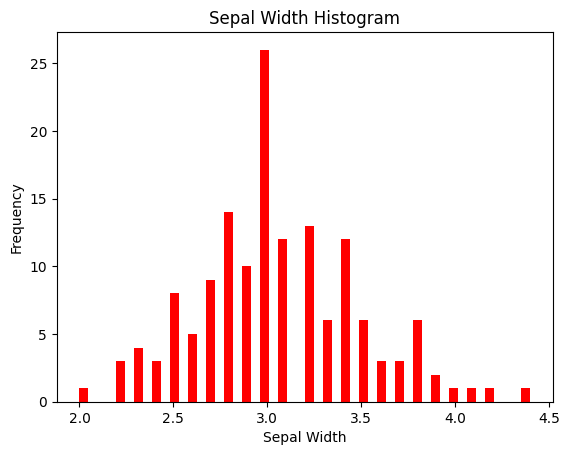

In [24]:
sepal_width = flowers['sepal_width']
plt.hist(sepal_width,bins=50, color='red')
plt.title("Sepal Width Histogram")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()

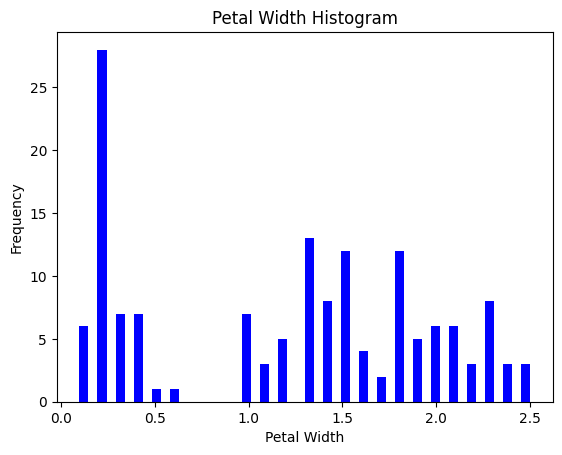

In [26]:
petal_width = flowers['petal_width']
plt.hist(petal_width,bins=50, color='blue')
plt.title("Petal Width Histogram")
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.show()

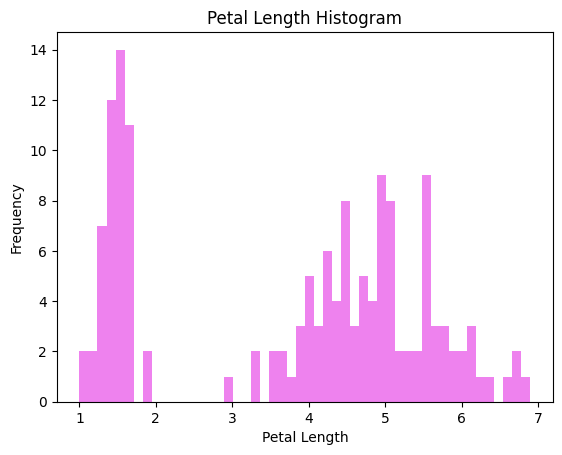

In [27]:
petal_length = flowers['petal_length']
plt.hist(petal_length,bins=50, color='violet')
plt.title("Petal Length Histogram")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.show()

In [31]:
species = flowers['species']
count = len(species.unique())
print(f"No of unique species : {count}")
print(species.value_counts())

No of unique species : 3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


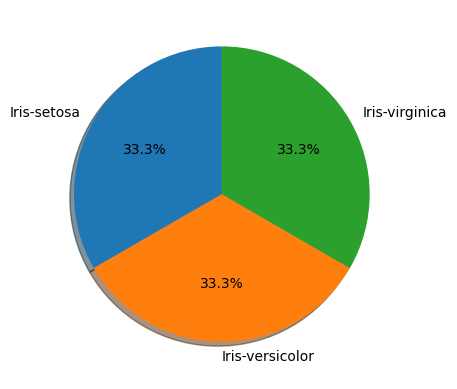

In [36]:
vector = []
for obj,cnt in species.value_counts().items():
    vector.append(cnt)
s = species.unique()
plt.pie(vector, labels = s, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

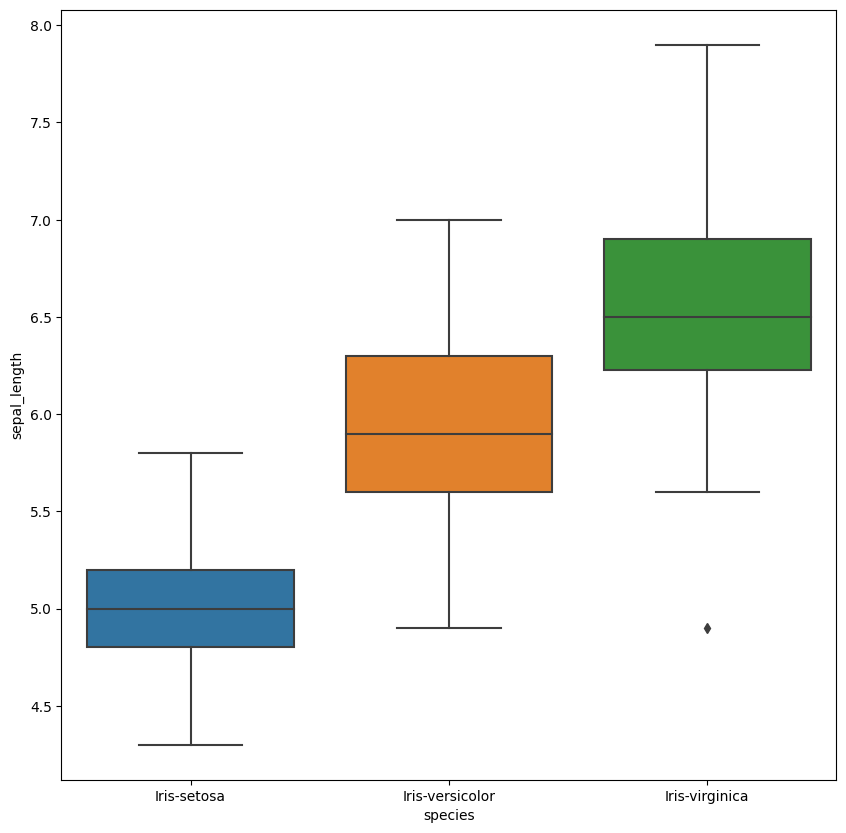

In [37]:
plt.figure(figsize= (10,10))
sns.boxplot(x='species', y='sepal_length', data=flowers)
plt.show()

<Figure size 1000x1000 with 0 Axes>

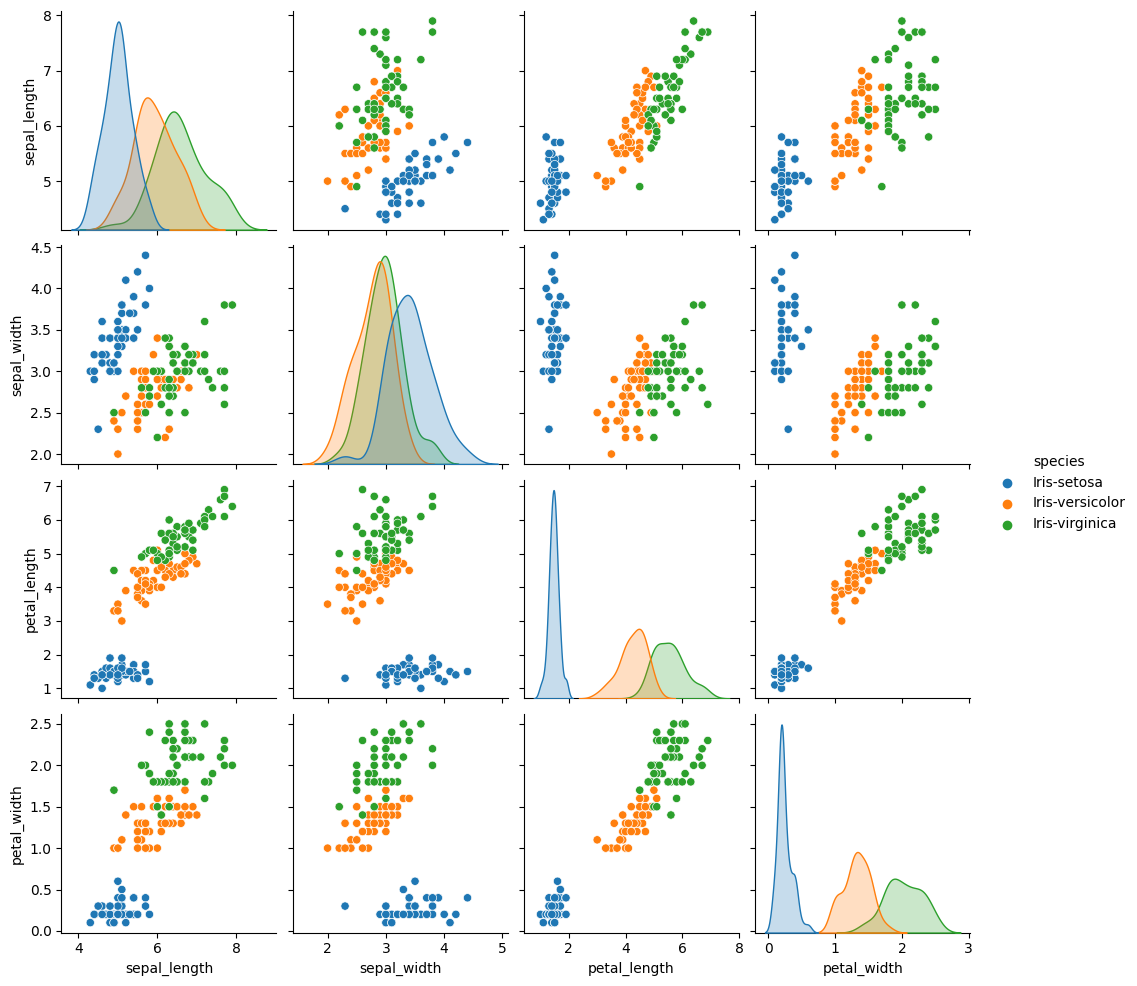

In [38]:
plt.figure(figsize= (10,10))
sns.pairplot(flowers, hue='species')

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

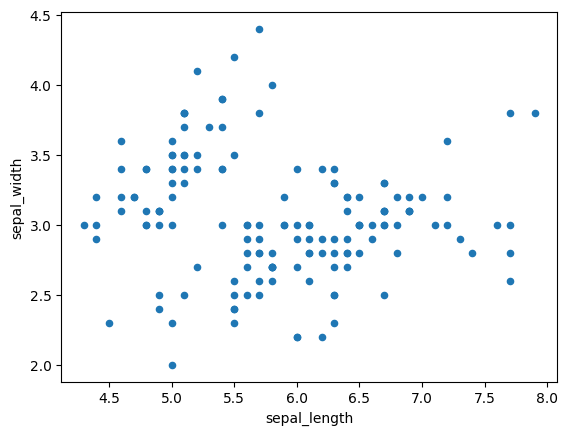

In [41]:
flowers.plot(kind='scatter', x='sepal_length', y='sepal_width')

In [42]:
correlation = flowers.corr()

C:\Users\koush\AppData\Local\Temp\ipykernel_28628\1906698351.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = flowers.corr()


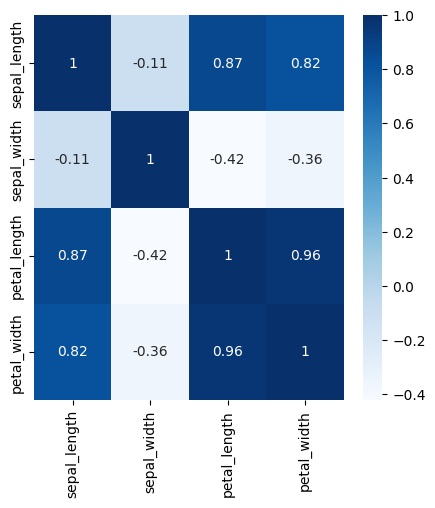

In [43]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.show()

In [44]:
X = flowers.drop(['species'],axis=1)
Y = flowers['species']

In [45]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=5)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


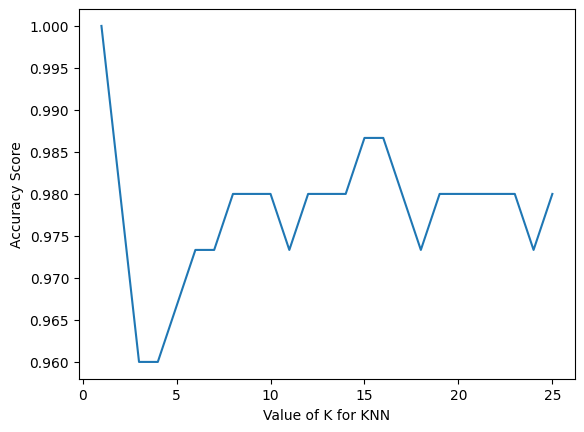

In [53]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,Y)
    Y_predict = knn.predict(X)
    scores.append(metrics.accuracy_score(Y,Y_predict))
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')    
plt.show()


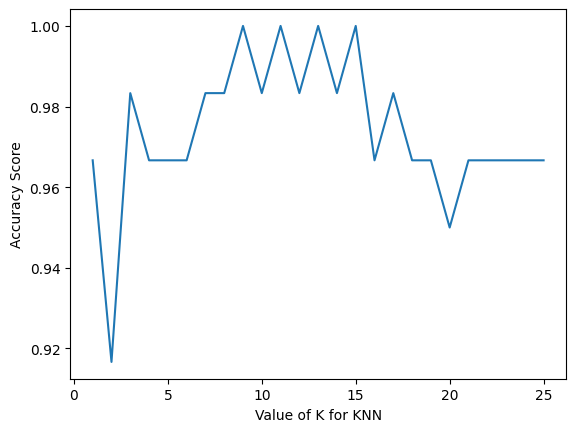

In [54]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,Y_predict))
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')    
plt.show()

In [74]:
knn = KNeighborsClassifier(n_neighbors=14, p=2, metric='minkowski')
knn.fit(X_train,Y_train)
Y_predict = knn.predict(X_test)
knn_score = metrics.accuracy_score(Y_test,Y_predict)
print(f"KNN score is : {knn_score}")

KNN score is : 0.9833333333333333


In [75]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_predict = model.predict(X_test)
lr_score = metrics.accuracy_score(Y_test,y_predict)
print(f"Logistic Regression score is : {lr_score}")

Logistic Regression score is : 0.9833333333333333


In [76]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
y_predict = tree.predict(X_test)
tree_score = metrics.accuracy_score(Y_test,y_predict)
print(f"Decision Tree score is : {tree_score}")

Decision Tree score is : 0.95


In [77]:
svc = SVC()
svc.fit(X_train,Y_train)
y_predict = svc.predict(X_test)
svc_score = metrics.accuracy_score(Y_test,y_predict)
print(f"SVC score is : {svc_score}")

SVC score is : 0.9833333333333333


In [73]:
data = pd.DataFrame({'models':['KNN','Logistic Regressiom','DecisionTreeClassifier','support Vector Classifier'],
                     'Accuracy':[knn_score,lr_score,tree_score,svc_score]})
print(data.sort_values('Accuracy',ascending=False))

                      models  Accuracy
0                        KNN  0.983333
1        Logistic Regressiom  0.983333
3  support Vector Classifier  0.983333
2     DecisionTreeClassifier  0.966667
